Calculate the Cqs for qPCR data and convert to DNA concentration

/Users/Shin/.virtualenvs/PLAseq/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/Shin/.virtualenvs/PLAseq/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,Well,Fluor,Target,Content,Probe,End RFU,Depletant,Sample Type,CallType,Is Control,Cqs
0,A01,SYBR,12000.0,CRP,3.93,16834.84171,0,ControlPositive,Unassigned,False,21.990331
1,A02,SYBR,12000.0,CRP,3.93,17334.65573,0,ControlPositive,Unassigned,False,21.984338
2,A03,SYBR,12000.0,CRP,3.93,17517.33114,0,ControlPositive,Unassigned,False,22.051993
3,A04,SYBR,2000.0,CRP,3.93,20105.64293,0,ControlPositive,Unassigned,False,22.335825
4,A05,SYBR,2000.0,CRP,3.93,18074.42376,0,ControlPositive,Unassigned,False,22.131295


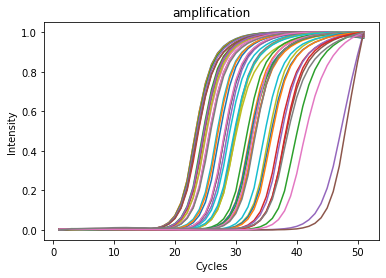

In [23]:
from qPCR_methods import *

topdir = ""
data_file = "admin_2020-09-23 11-02-36_CT022200_PLAcrp_epitope"

# Load data and process qPCR raw data.
# Plot normalized intensity data for all wells.
data, plate_df = run_data_to_cqs_on_plate(topdir, data_file, plot_data=True)
plate_df.head()

Load calibration file and conver Cqs to DNA concentration

In [24]:
coefs_1b = calc_Cq_to_DNA(cal_file="1B_ctrl_output.csv")
plate_df = convert_df_cq_to_DNA(plate_df, coefs_1b)
# plate_df = plot_dna_conc(plate_df, coefs_1b)

Plot data

<Figure size 1080x2160 with 0 Axes>

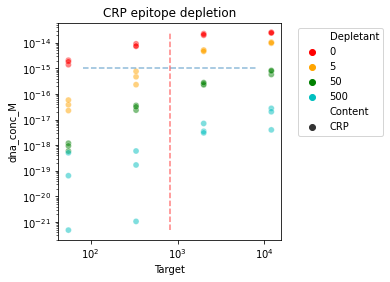

In [28]:
plt.figure(figsize=(15,30))
plot_scatter(plate_df, title = "CRP epitope depletion", targs="CRP", hue="Depletant" )
# plt.savefig(topdir +"Depletion.png", dpi=500, bbox_inches = "tight")
# plate_df.to_csv(topdir + "CRPdata.csv")